In [ ]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Reading the dataset
df = pd.read_csv('data/students.csv')

In [ ]:
#This will show the top 5 records
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#This will give the number of rows and cols in dataset (row,col)
df.shape

(1000, 8)

In [7]:
#Checking missing values
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
#Checking null values
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [9]:
#This will show the datatype of each col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
#This will give all the statistical feature of the dataset
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [12]:
#Exploring data
print("Categories in 'gender' variable: ", end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental level of education' variable:", end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable: ", end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable: ", end=" " )
print(df['test_preparation_course'].unique())


Categories in 'gender' variable:  ['female' 'male']
Categories in 'race/ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test preparation course' variable:  ['none' 'completed']


In [24]:
#Defining numerical and categorical features
numerical_features = [feature for feature in df.columns if df[feature].dtype!='object']
categorical_features = [feature for feature in df.columns if df[feature].dtype=='object']

# Printing numerical features
print(f"We have {len(numerical_features)} numerical features and they are: {numerical_features}")

# Printing categorical features
print(f"We have {len(categorical_features)} categorical features and they are: {categorical_features}")

We have 3 numerical features and they are: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features and they are: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [26]:
#Adding col for Total Score and Average
df['Total Score'] = df['math_score']+df['reading_score']+df['writing_score']
df['Average'] = df['Total Score']/3

In [27]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [32]:
reading_full = df[df['reading_score']==100]['Average'].count()
math_full = df[df['math_score']==100]['Average'].count()
writing_full = df[df['writing_score']==100]['Average'].count()

print(f"Number of students with full marks in reading score: {reading_full}")
print(f"Number of students with full marks in math score: {math_full}")
print(f"Number of students with full marks in writing score: {writing_full}")


Number of students with full marks in reading score: 17
Number of students with full marks in math score: 7
Number of students with full marks in writing score: 14


In [33]:
reading_low = df[df['reading_score'] <= 20]['Average'].count()
math_low = df[df['math_score'] <= 20]['Average'].count()
writing_low = df[df['writing_score'] <= 20]['Average'].count()

print(f"Number of students with <=20 marks in reading score: {reading_low}")
print(f"Number of students with <=20 marks in math score: {math_low}")
print(f"Number of students with <=20 marks in writing score: {writing_low}")


Number of students with <=20 marks in reading score: 1
Number of students with <=20 marks in math score: 4
Number of students with <=20 marks in writing score: 3


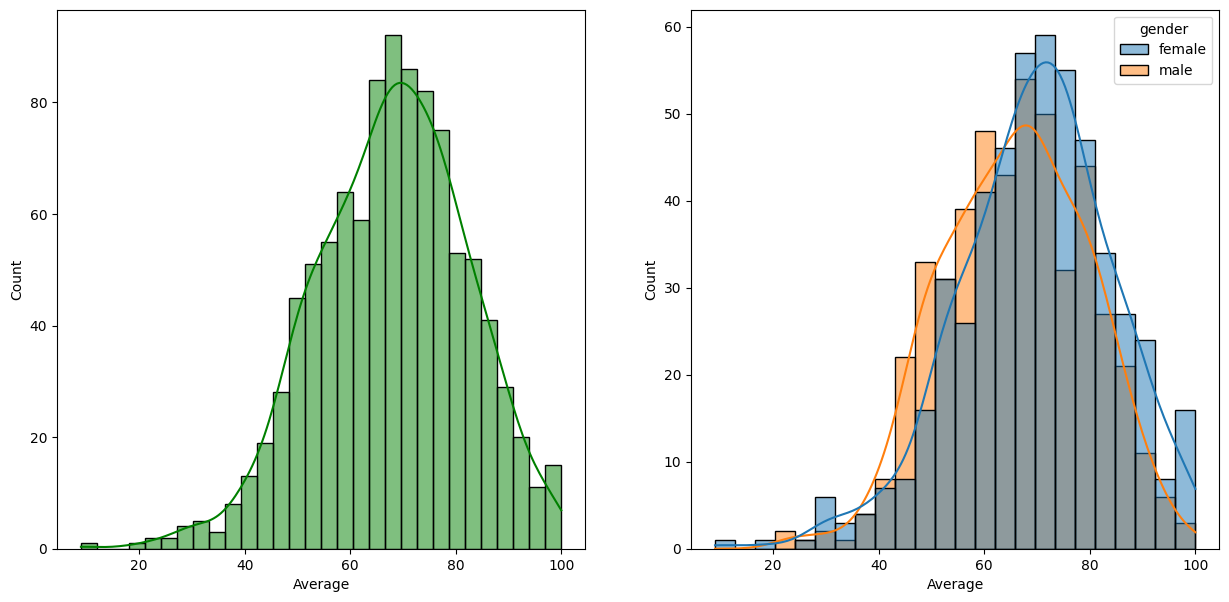

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First histogram (overall distribution of average score)
plt.subplot(121)
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g')

# Second histogram (distribution separated by gender)
plt.subplot(122)
sns.histplot(data=df, x='Average', kde=True, hue='gender')

# Show plots
plt.show()